In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv('C:\\Users\\Gitau\\desktop\\pydata\\Credit card transactions - India - Simple.csv.zip')
data

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174



1. CLEANING

In [7]:
data.isnull().value_counts()

index  City   Date   Card Type  Exp Type  Gender  Amount
False  False  False  False      False     False   False     26052
Name: count, dtype: int64

In [8]:
data.duplicated().value_counts()

False    26052
Name: count, dtype: int64

PRE-PROCESSING

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [9]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\Gitau\AppData\Local\Temp\ipykernel_1052\1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


ANALYSIS

In [12]:
data.describe()

,index,Date,Amount
count,26052.000000,26052,26052.000000
mean,13025.500000,2014-07-30 11:34:44.385075968,156411.537425
min,0.000000,2013-10-04 00:00:00,1005.000000
25%,6512.750000,2014-03-02 00:00:00,77120.250000
50%,13025.500000,2014-08-02 00:00:00,153106.500000
75%,19538.250000,2014-12-28 00:00:00,228050.000000
max,26051.000000,2015-05-26 00:00:00,998077.000000
std,7520.708943,NaN,103063.254287


In [12]:
th = data.set_index('Date')
th

,index,City,Card Type,Exp Type,Gender,Amount
Date,,,,,,
2014-10-29,0,"Delhi, India",Gold,Bills,F,82475
2014-08-22,1,"Greater Mumbai, India",Platinum,Bills,F,32555
2014-08-27,2,"Bengaluru, India",Silver,Bills,F,101738
2014-04-12,3,"Greater Mumbai, India",Signature,Bills,F,123424
2015-05-05,4,"Bengaluru, India",Gold,Bills,F,171574
...,...,...,...,...,...,...
2014-06-22,26047,"Kolkata, India",Silver,Travel,F,128191
2014-08-03,26048,"Pune, India",Signature,Travel,M,246316
2015-01-16,26049,"Hyderabad, India",Silver,Travel,M,265019


In [25]:
monthly = th['Exp Type'].resample('ME').count()
monthly

Date
2013-10-31    1291
2013-11-30    1257
2013-12-31    1379
2014-01-31    1345
2014-02-28    1191
2014-03-31    1314
2014-04-30    1295
2014-05-31    1321
2014-06-30    1239
2014-07-31    1310
2014-08-31    1393
2014-09-30    1321
2014-10-31    1374
2014-11-30    1365
2014-12-31    1323
2015-01-31    1377
2015-02-28    1242
2015-03-31    1308
2015-04-30    1292
2015-05-31    1115
Freq: ME, Name: Exp Type, dtype: int64

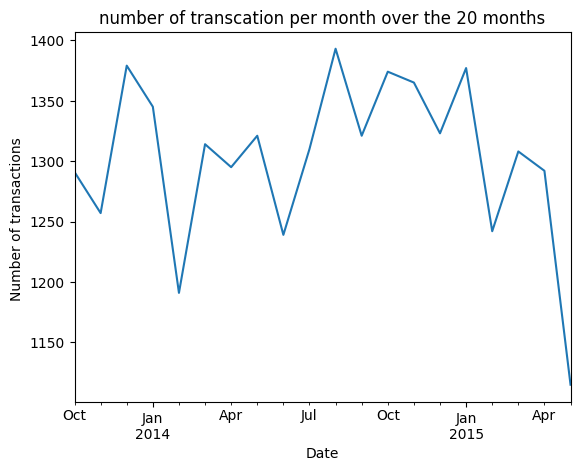

In [26]:
monthly.plot(kind= 'line')
plt.title('number of transcation per month over the 20 months')
plt.ylabel('Number of transactions ')
plt.show()

In [43]:
k = th.groupby(['Gender','Card Type'])['Card Type'].count()
k

Gender  Card Type
F       Gold         3287
        Platinum     3252
        Signature    3368
        Silver       3773
M       Gold         3080
        Platinum     3146
        Signature    3079
        Silver       3067
Name: Card Type, dtype: int64

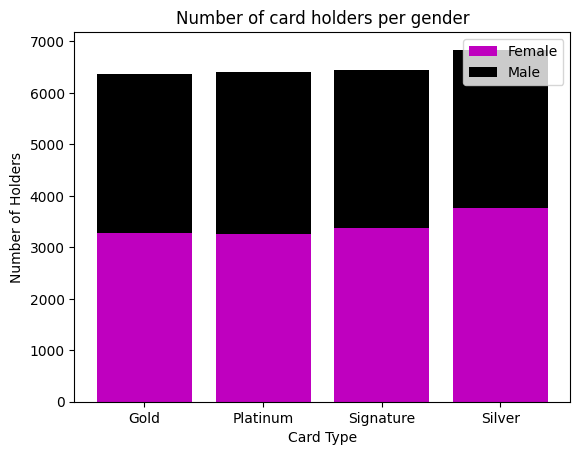

In [28]:
x = ['Gold','Platinum','Signature','Silver']
y1 =[3287, 3252,3368,3773]
y2 =[3080,3146,3079,3067]

plt.bar(x,y1,color='m')
plt.bar(x,y2,bottom=y1,color='k')
plt.xlabel('Card Type')
plt.ylabel('Number of Holders')
plt.legend(['Female','Male'])
plt.title('Number of card holders per gender')
plt.show()

In [44]:
z = th.groupby(['Gender','Exp Type'])['Amount'].sum().reset_index()
z

,Gender,Exp Type,Amount
0,F,Bills,580035469
1,F,Entertainment,358663333
2,F,Food,452817279
3,F,Fuel,392282421
4,F,Grocery,365646998
5,F,Travel,55865530
6,M,Bills,327037004
7,M,Entertainment,367774203
8,M,Food,371906730
9,M,Fuel,396853400


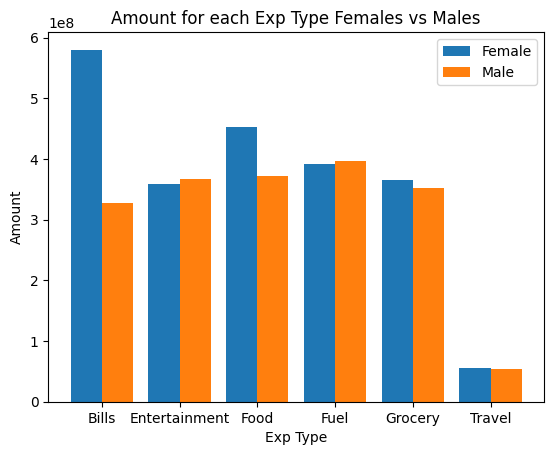

In [29]:
w = 0.4
x = ['Bills','Entertainment','Food','Fuel','Grocery','Travel']
Female = [580035469,358663333,452817279,392282421,365646998,55865530]
Male = [327037004,367774203,371906730,396853400,352560925,53390081]
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,Female,w,label = 'Female')
plt.bar(bar2,Male,w,label = 'Male')

plt.xlabel('Exp Type')
plt.ylabel('Amount')
plt.title('Amount for each Exp Type Females vs Males')
plt.xticks(bar1+w/2,x)
plt.legend()
plt.show()

In [45]:
th['Exp Type'].value_counts()

Exp Type
Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: count, dtype: int64

<Axes: title={'center': 'Transaction per exp.type'}, ylabel='count'>

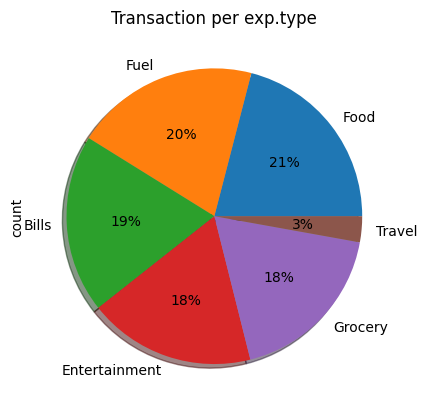

In [46]:

th['Exp Type'].value_counts().plot(kind='pie',y='Transaction type',title='Transaction per exp.type',autopct='%1.0f%%',shadow=True)

In [47]:
city = th['City'].value_counts().head(10)
city

City
Bengaluru, India         3552
Greater Mumbai, India    3493
Ahmedabad, India         3491
Delhi, India             3482
Hyderabad, India          784
Chennai, India            774
Kolkata, India            773
Kanpur, India             764
Lucknow, India            759
Jaipur, India             752
Name: count, dtype: int64

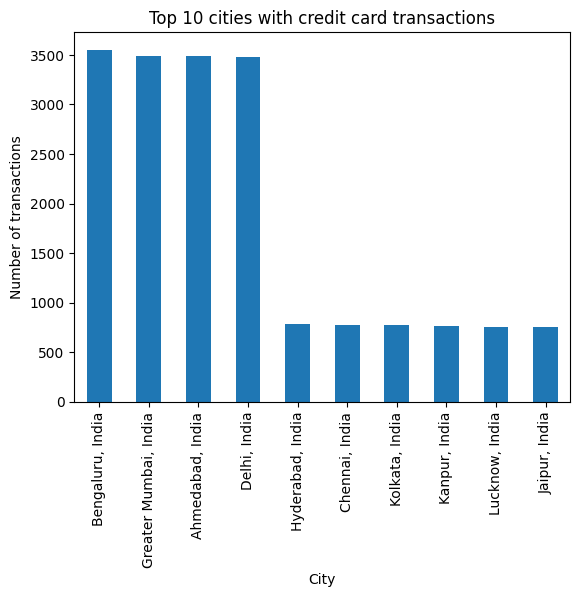

In [37]:
city.plot(kind='bar')
plt.title('Top 10 cities with credit card transactions')
plt.ylabel('Number of transactions')
plt.show()

In [7]:
data['Gender'].value_counts()

Gender
F    13680
M    12372
Name: count, dtype: int64

In [9]:
data['Card Type'].value_counts()

Card Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64

In [48]:
b = th.groupby('Card Type')['Amount'].sum()
b

Card Type
Gold          984539536
Platinum     1007639019
Signature    1013041105
Silver       1069613713
Name: Amount, dtype: int64

Text(0.5, 1.0, 'Amount spent per card')

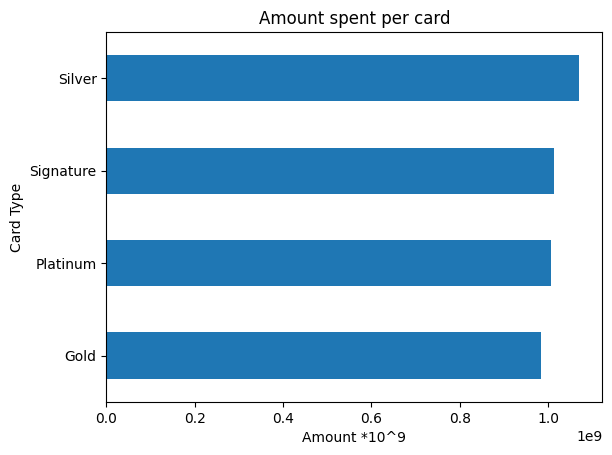

In [49]:
b.plot(kind='barh')
plt.ylabel('Card Type')
plt.xlabel('Amount *10^9')
plt.title('Amount spent per card')

In [27]:
travel = th[th['Exp Type']=='Travel']
travel

,index,City,Card Type,Exp Type,Gender,Amount
Date,,,,,,
2014-04-21,25313,"Kanpur, India",Platinum,Travel,F,155284
2013-10-05,25314,"Chennai, India",Silver,Travel,M,279582
2014-03-05,25315,"Jaipur, India",Gold,Travel,M,40391
2015-03-19,25316,"Lucknow, India",Gold,Travel,F,70080
2014-08-01,25317,"Jaipur, India",Silver,Travel,M,26324
...,...,...,...,...,...,...
2013-10-09,26046,"Hyderabad, India",Signature,Travel,M,198903
2014-06-22,26047,"Kolkata, India",Silver,Travel,F,128191
2014-08-03,26048,"Pune, India",Signature,Travel,M,246316


In [42]:
travel['City'].nunique()

8

In [43]:
travel['City'].value_counts().head(5)

City
Jaipur, India       103
Kanpur, India       102
Chennai, India      101
Hyderabad, India     99
Kolkata, India       87
Name: count, dtype: int64

In [44]:
travel['Card Type'].value_counts()

Card Type
Gold         212
Platinum     179
Signature    179
Silver       168
Name: count, dtype: int64

In [17]:
travel['Gender'].value_counts()

Gender
F    379
M    359
Name: count, dtype: int64

In [39]:
k = travel['Amount']
trv = k.resample('ME').sum()
trv

Date
2013-10-31    3832883
2013-11-30    5652840
2013-12-31    5867883
2014-01-31    4557965
2014-02-28    4665816
2014-03-31    5051459
2014-04-30    6261113
2014-05-31    6906496
2014-06-30    6235434
2014-07-31    4483812
2014-08-31    3811831
2014-09-30    3272659
2014-10-31    5837558
2014-11-30    7929200
2014-12-31    6519505
2015-01-31    4533120
2015-02-28    5743725
2015-03-31    5829348
2015-04-30    6627294
2015-05-31    5635670
Freq: ME, Name: Amount, dtype: int64

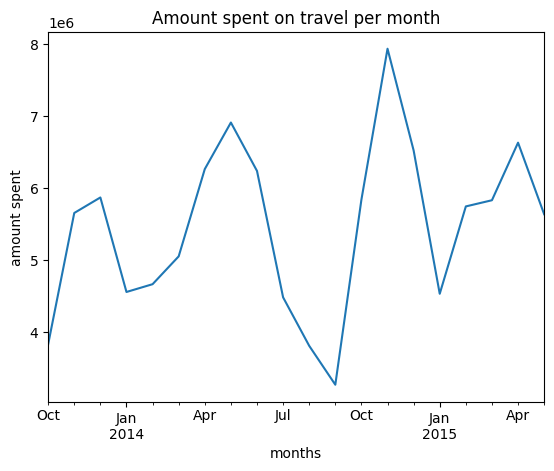

In [33]:
trv.plot(kind='line')
plt.xlabel('months')
plt.ylabel('amount spent')
plt.title('Amount spent on travel per month')
plt.show()

In [34]:
enter = th[th['Exp Type']=='Entertainment']
enter

,index,City,Card Type,Exp Type,Gender,Amount
Date,,,,,,
2013-12-11,760,"Ahmedabad, India",Silver,Entertainment,F,236449
2015-04-12,765,"Delhi, India",Silver,Entertainment,F,179481
2013-12-27,775,"Greater Mumbai, India",Silver,Entertainment,F,299122
2014-10-22,776,"Bengaluru, India",Silver,Entertainment,F,132237
2015-04-26,777,"Ahmedabad, India",Silver,Entertainment,F,64149
...,...,...,...,...,...,...
2014-06-19,25294,"Chennai, India",Gold,Entertainment,M,108232
2015-01-08,25297,"Hyderabad, India",Platinum,Entertainment,F,190354
2014-12-24,25299,"Hyderabad, India",Signature,Entertainment,M,98224


In [74]:
enter['City'].value_counts().head(5)

City
Bengaluru, India         624
Ahmedabad, India         622
Greater Mumbai, India    614
Delhi, India             594
Surat, India             152
Name: count, dtype: int64

In [38]:
y = enter['Amount']
ent = y.resample('ME').sum()
ent

Date
2013-10-31    38899912
2013-11-30    35185282
2013-12-31    39009475
2014-01-31    35802198
2014-02-28    31735758
2014-03-31    38791745
2014-04-30    38461648
2014-05-31    34908180
2014-06-30    34320597
2014-07-31    40477283
2014-08-31    40495636
2014-09-30    36492124
2014-10-31    37171286
2014-11-30    38809389
2014-12-31    36264726
2015-01-31    39221930
2015-02-28    31221992
2015-03-31    33668530
2015-04-30    38111689
2015-05-31    27388156
Freq: ME, Name: Amount, dtype: int64

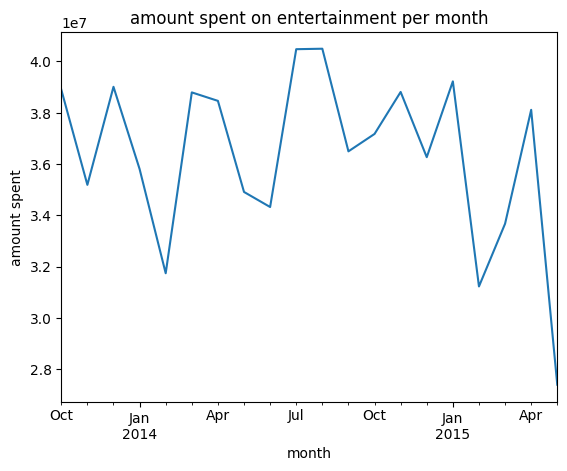

In [41]:
ent.plot(kind='line')
plt.xlabel('month')
plt.ylabel('amount spent')
plt.title('amount spent on entertainment per month')
plt.show()

In [39]:
enter['City'].value_counts().head(5)

City
Bengaluru, India         624
Ahmedabad, India         622
Greater Mumbai, India    614
Delhi, India             594
Surat, India             152
Name: count, dtype: int64

In [40]:
enter['Card Type'].value_counts()

Card Type
Silver       1262
Platinum     1187
Signature    1170
Gold         1143
Name: count, dtype: int64

In [41]:
enter['Gender'].value_counts()

Gender
F    2384
M    2378
Name: count, dtype: int64

In [14]:
bills = th[th['Exp Type']=='Bills']
bills

,index,City,Card Type,Exp Type,Gender,Amount
Date,,,,,,
2014-10-29,0,"Delhi, India",Gold,Bills,F,82475
2014-08-22,1,"Greater Mumbai, India",Platinum,Bills,F,32555
2014-08-27,2,"Bengaluru, India",Silver,Bills,F,101738
2014-04-12,3,"Greater Mumbai, India",Signature,Bills,F,123424
2015-05-05,4,"Bengaluru, India",Gold,Bills,F,171574
...,...,...,...,...,...,...
2013-12-13,25291,"Lucknow, India",Gold,Bills,F,63335
2014-11-27,25293,"Surat, India",Gold,Bills,M,186860
2013-12-01,25309,"Jaipur, India",Silver,Bills,M,157997


In [66]:
bills['City'].value_counts().max

<bound method Series.max of City
Bengaluru, India         735
Greater Mumbai, India    728
Delhi, India             701
Ahmedabad, India         680
Kolkata, India           149
                        ... 
Palia Kalan, India         1
Dhamtari, India            1
Shahabad, India            1
Kochi, India               1
Nahan, India               1
Name: count, Length: 699, dtype: int64>

In [64]:
bills['Card Type'].value_counts()

Card Type
Silver       1334
Signature    1259
Gold         1256
Platinum     1229
Name: count, dtype: int64

In [65]:
bills['Gender'].value_counts()

Gender
F    2860
M    2218
Name: count, dtype: int64

In [15]:
b = bills['Amount']
ty = b.resample('ME').sum()
ty

Date
2013-10-31    50295291
2013-11-30    39732241
2013-12-31    46137482
2014-01-31    43264467
2014-02-28    45021501
2014-03-31    45728612
2014-04-30    46146204
2014-05-31    44377242
2014-06-30    45575867
2014-07-31    41433680
2014-08-31    50861649
2014-09-30    46420377
2014-10-31    46736857
2014-11-30    43898477
2014-12-31    44276480
2015-01-31    50233016
2015-02-28    43260213
2015-03-31    47808820
2015-04-30    49345836
2015-05-31    36518161
Freq: ME, Name: Amount, dtype: int64

In [16]:
fuel= th[th['Exp Type']=='Fuel']
fuel

,index,City,Card Type,Exp Type,Gender,Amount
Date,,,,,,
2014-05-06,763,"Bengaluru, India",Silver,Fuel,F,194493
2014-12-27,767,"Greater Mumbai, India",Silver,Fuel,F,249400
2014-12-18,783,"Greater Mumbai, India",Silver,Fuel,F,239856
2014-04-14,785,"Greater Mumbai, India",Silver,Fuel,F,10476
2014-06-15,788,"Delhi, India",Silver,Fuel,F,31365
...,...,...,...,...,...,...
2015-01-29,25300,"Lucknow, India",Platinum,Fuel,M,68952
2014-07-08,25304,"Lucknow, India",Signature,Fuel,M,23952
2014-07-06,25307,"Surat, India",Platinum,Fuel,F,111182


In [17]:
f = fuel['Amount']
zh = f.resample('ME').sum()
zh

Date
2013-10-31    36974874
2013-11-30    35523649
2013-12-31    41440215
2014-01-31    43969869
2014-02-28    38049793
2014-03-31    39357883
2014-04-30    38192940
2014-05-31    38282048
2014-06-30    36696922
2014-07-31    40808245
2014-08-31    42170734
2014-09-30    45609869
2014-10-31    40752691
2014-11-30    37257540
2014-12-31    40548650
2015-01-31    44098388
2015-02-28    41770574
2015-03-31    42356420
2015-04-30    30216278
2015-05-31    35058239
Freq: ME, Name: Amount, dtype: int64

In [18]:
grocery= th[th['Exp Type']=='Grocery']
grocery

,index,City,Card Type,Exp Type,Gender,Amount
Date,,,,,,
2014-02-26,762,"Ahmedabad, India",Silver,Grocery,F,36575
2014-05-25,768,"Delhi, India",Silver,Grocery,F,213000
2013-12-08,772,"Greater Mumbai, India",Silver,Grocery,F,183633
2014-10-15,780,"Bengaluru, India",Silver,Grocery,F,53822
2013-11-02,787,"Ahmedabad, India",Silver,Grocery,F,171803
...,...,...,...,...,...,...
2014-07-15,25292,"Kolkata, India",Silver,Grocery,F,244334
2014-06-04,25295,"Lucknow, India",Gold,Grocery,F,279603
2014-11-16,25296,"Pune, India",Platinum,Grocery,M,26217


In [19]:
g = grocery['Amount']
cb = g.resample('ME').sum()
cb

Date
2013-10-31    33414663
2013-11-30    38657298
2013-12-31    39734929
2014-01-31    38778511
2014-02-28    32123750
2014-03-31    33469230
2014-04-30    36277753
2014-05-31    34742619
2014-06-30    34013894
2014-07-31    33599407
2014-08-31    37525614
2014-09-30    35860951
2014-10-31    36758867
2014-11-30    39478945
2014-12-31    35999420
2015-01-31    37670560
2015-02-28    34666258
2015-03-31    34550966
2015-04-30    37994661
2015-05-31    32889627
Freq: ME, Name: Amount, dtype: int64

In [20]:
food = th[th['Exp Type']=='Food']
food

,index,City,Card Type,Exp Type,Gender,Amount
Date,,,,,,
2014-11-20,468,"Greater Mumbai, India",Silver,Food,F,193429
2014-04-22,469,"Ahmedabad, India",Gold,Food,F,97674
2014-03-08,470,"Bengaluru, India",Silver,Food,F,222579
2015-03-19,471,"Bengaluru, India",Platinum,Food,F,194846
2015-02-22,472,"Greater Mumbai, India",Signature,Food,F,62690
...,...,...,...,...,...,...
2014-04-21,25286,"Kanpur, India",Platinum,Food,F,250805
2013-10-31,25288,"Pune, India",Gold,Food,F,29419
2015-01-16,25302,"Jaipur, India",Gold,Food,F,129609


In [22]:
x = food['Amount']
bn= x.resample('ME').sum()
bn

Date
2013-10-31    43942469
2013-11-30    37264653
2013-12-31    42077845
2014-01-31    41277972
2014-02-28    37623562
2014-03-31    40834378
2014-04-30    42945074
2014-05-31    42545727
2014-06-30    34478325
2014-07-31    37178989
2014-08-31    43587662
2014-09-30    41905453
2014-10-31    45228656
2014-11-30    44718454
2014-12-31    39058805
2015-01-31    47801560
2015-02-28    37629682
2015-03-31    42607055
2015-04-30    45814244
2015-05-31    36203444
Freq: ME, Name: Amount, dtype: int64

In [30]:
dates = ['2013-10-31','2013-11-30','2013-12-31','2014-01-31','2014-02-28','2014-03-31','2014-04-30','2014-05-31','2014-06-30','2014-07-31','2014-08-31','2014-09-30','2014-10-31','2014-11-30','2014-12-31','2015-01-31','2015-02-28','2015-03-31','2015-04-30','2015-05-31']
TRavel = [3832883,5652840,5867883,4557965,4665816,5051459,6261113,6906496,6235434,4483812,3811831,3272659,5837558,7929200,6519505,4533120,5743725,5829348,6627294,5635670]
ENtertainment = [38899912,35185282,39009475,35802198,31735758,38791745,38461648,34908180,34320597,40477283,40495636,36492124,37171286,38809389,36264726,39221930,31221992,33668530,38111689,27388156]
BIlls = [50295291,39732241,46137482,43264467,45021501,45728612,46146204,44377242,45575867,41433680,50861649,46420377,46736857,43898477,44276480,50233016,43260213,47808820,49345836,36518161]
FUel = [36974874,35523649,41440215,43969869,38049793,39357883,38192940,38282048,36696922,40808245,42170734,45609869,40752691,37257540,40548650,44098388,41770574,42356420,30216278,35058239]
GRocery = [33414663,38657298,39734929,38778511,32123750,33469230,36277753,34742619,34013894,33599407,37525614,35860951,36758867,39478945,35999420,37670560,34666258,34550966,37994661,32889627]
FOod = [43942469,37264653,42077845,41277972,37623562,40834378,42945074,42545727,34478325,37178989,43587662,41905453,45228656,44718454,39058805,47801560,37629682,42607055,45814244,36203444]
TRends = pd.DataFrame(list(zip(TRavel,ENtertainment,BIlls,FUel,GRocery,FOod)),index=dates,columns=['TRavel','ENtertainment','BIlls','FUel','GRocery','FOod'])
TRends

,TRavel,ENtertainment,BIlls,FUel,GRocery,FOod
2013-10-31,3832883,38899912,50295291,36974874,33414663,43942469
2013-11-30,5652840,35185282,39732241,35523649,38657298,37264653
2013-12-31,5867883,39009475,46137482,41440215,39734929,42077845
2014-01-31,4557965,35802198,43264467,43969869,38778511,41277972
2014-02-28,4665816,31735758,45021501,38049793,32123750,37623562
2014-03-31,5051459,38791745,45728612,39357883,33469230,40834378
2014-04-30,6261113,38461648,46146204,38192940,36277753,42945074
2014-05-31,6906496,34908180,44377242,38282048,34742619,42545727
2014-06-30,6235434,34320597,45575867,36696922,34013894,34478325
2014-07-31,4483812,40477283,41433680,40808245,33599407,37178989


In [ ]:
TRends.index = pd.to_datetime(TRends.index)

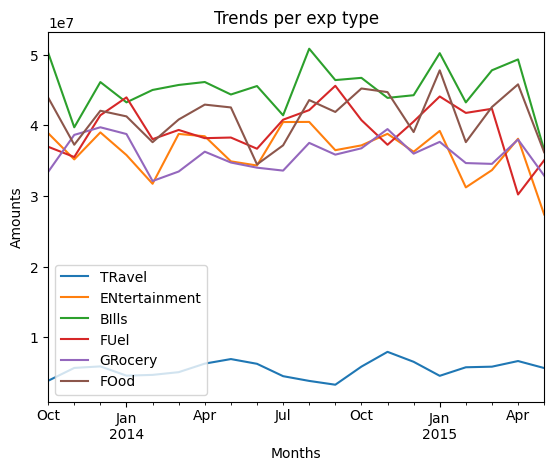

In [36]:
TRends.plot()
plt.title('Trends per exp type')
plt.xlabel('Months')
plt.ylabel('Amounts')
plt.show()